In [34]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

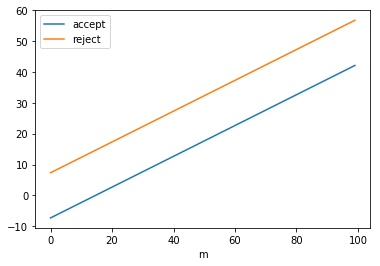

In [3]:
pl = 0.45
pu = 0.55
alpha = beta = 0.05
A = (1-beta)/alpha
B = beta/(1-alpha)

def a_m(m):
    return (np.log(B)+m*np.log((1-pl)/(1-pu)))/(np.log(pu/pl)-np.log((1-pu)/(1-pl)))


def r_m(m):
    return (np.log(A)+m*np.log((1-pl)/(1-pu)))/(np.log(pu/pl)-np.log((1-pu)/(1-pl)))


plt.plot(range(100), [a_m(i) for i in range(100)], label='accept')
plt.plot(range(100), [r_m(i) for i in range(100)], label='reject')
plt.xlabel('m')
plt.legend(loc='best')

In [33]:
def simulate(real_p, test_func, seed=42,  maxm=500):
    rs = np.random.RandomState(seed)
    d_m = []
    pvals = []
    m = 0
    binom_test_check = -1
    found_seq = False
    iter_num = -1
    while m<maxm and (iter_num<0 or binom_test_check<0):
        m+=1
        newp = 1.0*(rs.uniform()<=real_p)
        d_m += [newp]
        pvals.append( test_func(d_m))
        if iter_num<0 and (np.sum(d_m)<=a_m(m) or np.sum(d_m)>=r_m(m)):
            found_seq = True
            iter_num = m
            
        if binom_test_check and ( pvals[-1]<0.05):
            binom_test_check = m 
            
    plt.plot(np.cumsum(d_m))
    return len(d_m), pvals, iter_num

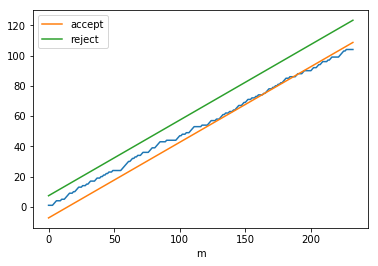

Text(0.5, 0, 'm')

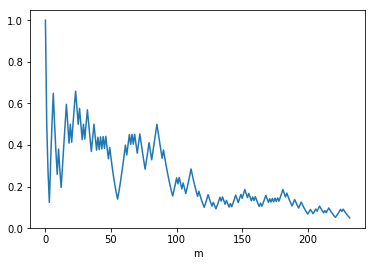

In [39]:
max_l, bin_test, _ = simulate(0.4, test_func= lambda x:proportions_ztest(np.sum(x), len(x), 0.5, 'smaller' )[1])

plt.plot(range(max_l), [a_m(i) for i in range(max_l)], label='accept')
plt.plot(range(max_l), [r_m(i) for i in range(max_l)], label='reject')
plt.xlabel('m')
plt.legend(loc='best')      
plt.show()

plt.plot(bin_test)        
plt.xlabel('m')

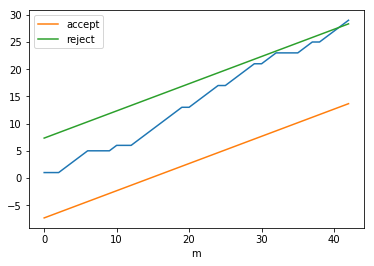

Text(0.5, 0, 'm')

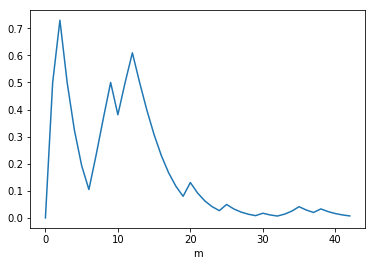

In [40]:
max_l, bin_test,_ = simulate(0.6,  test_func= lambda x:proportions_ztest(np.sum(x), len(x), 0.5, 'larger' )[1])
plt.plot(range(max_l), [a_m(i) for i in range(max_l)], label='accept')
plt.plot(range(max_l), [r_m(i) for i in range(max_l)], label='reject')
plt.xlabel('m')
plt.legend(loc='best')      

plt.show()
plt.plot(bin_test)        
plt.xlabel('m')        
      

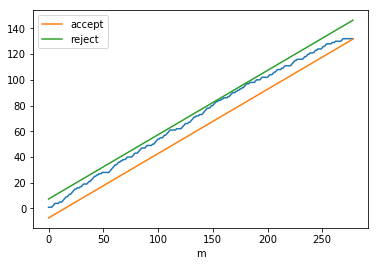

Text(0.5, 0, 'm')

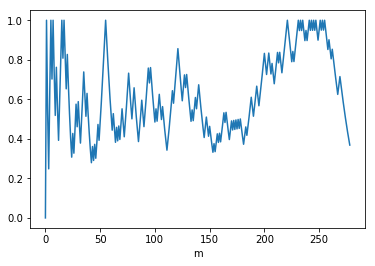

In [42]:
max_l, bin_test,_ = simulate(0.5,  test_func= lambda x:proportions_ztest(np.sum(x), len(x), 0.5, 'two-sided' )[1])
plt.plot(range(max_l), [a_m(i) for i in range(max_l)], label='accept')
plt.plot(range(max_l), [r_m(i) for i in range(max_l)], label='reject')
plt.xlabel('m')
plt.legend(loc='best')      
plt.show()
plt.plot(bin_test)        
plt.xlabel('m') 

      

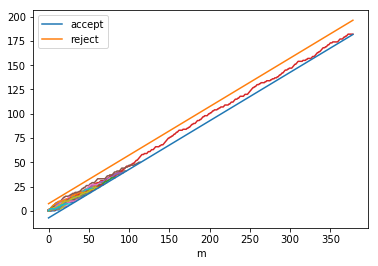

Text(0.5, 0, 'm')

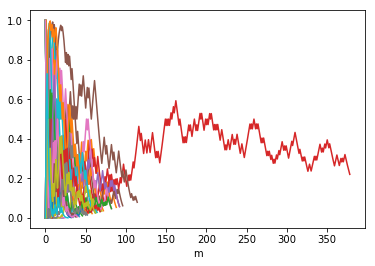

In [44]:
max_l = 0
bin_tests = []
iter_nums = []
for i in range(30):
    max_l_, bin_test, iter_num = simulate(0.4, seed=i , test_func= lambda x:proportions_ztest(np.sum(x), len(x), 0.5, 'smaller' )[1])
    max_l =max(max_l_, max_l)
    iter_nums.append(iter_num)
    bin_tests.append(bin_test)
plt.plot(range(max_l), [a_m(i) for i in range(max_l)], label='accept')
plt.plot(range(max_l), [r_m(i) for i in range(max_l)], label='reject')
plt.xlabel('m')
plt.legend(loc='best')      

plt.show()
for t in bin_tests:
    plt.plot(t)        
plt.xlabel('m') 
      

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 3., 1., 5., 4., 6., 3., 6.]),
 array([-379. , -366.6, -354.2, -341.8, -329.4, -317. , -304.6, -292.2,
        -279.8, -267.4, -255. , -242.6, -230.2, -217.8, -205.4, -193. ,
        -180.6, -168.2, -155.8, -143.4, -131. , -118.6, -106.2,  -93.8,
         -81.4,  -69. ,  -56.6,  -44.2,  -31.8,  -19.4,   -7. ]),
 <a list of 30 Patch objects>)

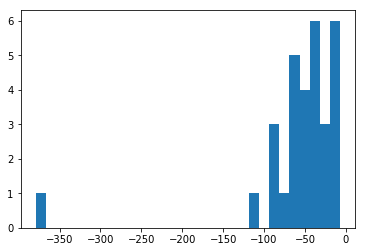

In [45]:
min_num = []
for p in bin_tests:
    min_num.append(np.where(np.array(p)<=0.05)[0][0])
min_num = np.array(min_num)
plt.hist(min_num-np.array(iter_nums), bins=30)


Decision:	Accept

     values    lower    upper
n                            
491   203.0  238.164  252.836
492   203.0  238.664  253.336
493   204.0  239.164  253.836
494   205.0  239.664  254.336
495   205.0  240.164  254.836
496   206.0  240.664  255.336
497   206.0  241.164  255.836
498   207.0  241.664  256.336
499   207.0  242.164  256.836
500   207.0  242.664  257.336


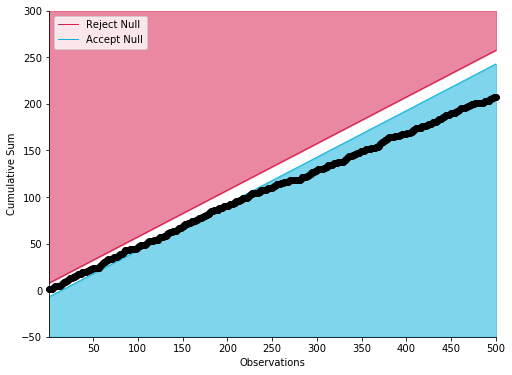

In [46]:
import sprt as sprt
rs = np.random.RandomState(42)
values = 1.0*(rs.uniform(size=500)<=0.4)
test = sprt.SPRTBinomial(alpha = 0.05, beta = 0.05, h0 = 0.45, h1 = 0.55, 
values = values)
test.plot()
